# 로지스틱 회귀 분석

로지스틱(Logistic) 회귀 분석은 그 명칭과 달리 회귀 분석 문제와 분류 문제 모두에 사용할 수 있다. 로지스틱 회귀 분석 모형에서는 종속 변수가 이항 분포를 따르고 그 모수 $\theta$가 독립 변수 $x$에 의존한다고 가정한다.

$$ p(y \mid x) = \text{Bin} (y \mid \theta(x), N) $$

위 식에서 보듯이 로지스틱 함수는 y의 값이 특정한 구간내의 값($0 \sim N$)만 가질 수 있기 때문에 종속변수가 이러한 특성을 가진 경우에 회귀 분석 망법으로 쓸 수 있다.  

또는 이항 분포의 특별한 경우($N=1$)로 y가 베르누이 확률분포인 경우도 있을 수 있다. 여기에서는 베르누이 확률분포를 따르는 로지스틱 회귀 분석만 고려하기로 한다.

$$ p(y \mid x) = \text{Bern} (y \mid  \theta(x) )$$

종속변수 $y$가 0또는 1인 분류 예측 문제를 풀 때는 x 값에 따라 $\theta(x)$를 예측한 후 다음 기준에 따라 y를 예측할 수 있다.

$$ \hat{y} = \begin{cases} 1 & \text{ if } \theta(x) \geq 0.5 \\ 0 & \text{ if } \theta(x) < 0.5 \end{cases} $$

## 시그모이드 함수

모수 $\theta$ 는 x의 함수 $\theta(x)$이다. 함수 $\theta(x)$는 x에 대한 선형 함수를 0부터 1사이의 값만 나올 수 있도록 시그모이드 함수(sigmoid function)라는 함수를 사용하여 변형한 것을 사용한다.

$$
\theta = f(w^Tx)
$$

모수 $\theta$는 일반적인 회귀 분석의 종속 변수와 달리 0 부터 1까지의 실수값만 가질 수 있기 때문에 시그모이드 함수이라 불리는 특별한 형태의 함수 $f$를 사용해야 한다. 시그모이드 함수는 종속 변수의 모든 실수 값에 대해 

* 유한한 구간 $(a,b)$ 사이의 한정된(bounded) 값과 
* 항상 0 또는 양의 기울기를 가지는 

함수의 집합을 말한다. 실제로는 다음과 같은 함수들이 주로 사용된다.

 * 로지스틱 함수(Logistic Function) 
 
$$ \text{logitstic}(z) = \sigma(z) = \dfrac{1}{1+\exp{(-z)}} $$
 
 * 하이퍼볼릭 탄젠트 함수(Hyperbolic tangent) 
 
$$ \tanh(z) = \frac{\sinh z}{\cosh z} = \frac {e^z - e^{-z}} {e^z + e^{-z}} = 2 \sigma(2x) - 1$$

 * 오차 함수(Error Function) 
 
$$ \text{erf}(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt $$
 


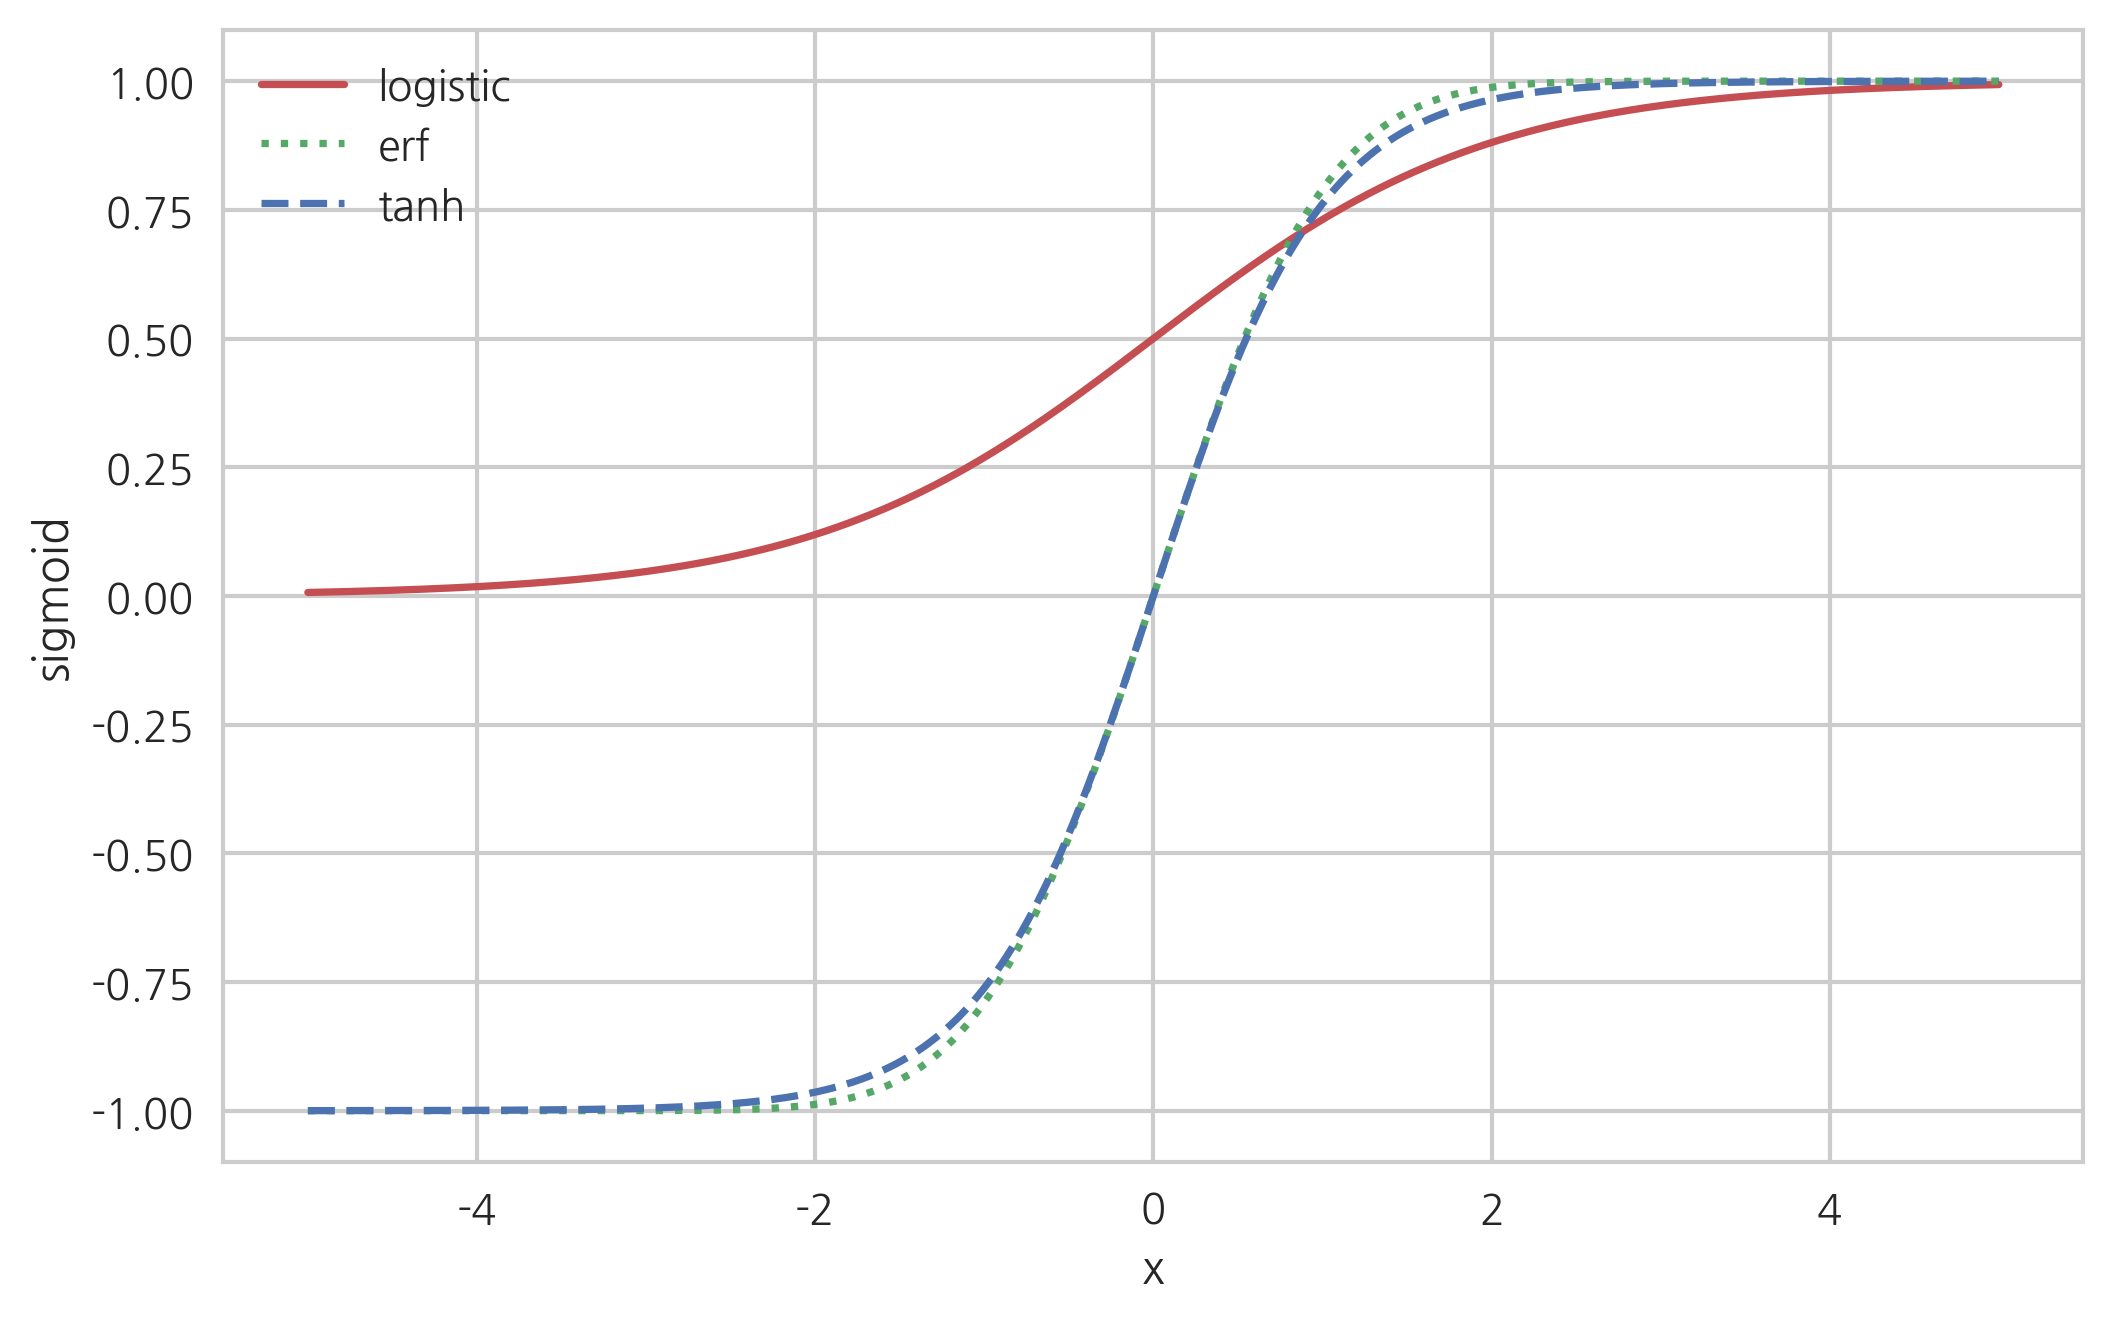

In [21]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="logistic")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="erf")
plt.plot(xx, np.tanh(xx), 'b--', label="tanh")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("sigmoid")
plt.show()

## 로지스틱 함수

여러가지 시그모이드 중 로지스틱 함수는 다음과 같은 물리적인 의미를 부여할 수 있기 때문에 많이 사용된다.

우선 Bernoulli 시도에서 1이 나올 확률 $\theta$ 과 0이 나올 확률 $1-\theta$ 의 비(ratio)는 다음과 같은 수식이 되며 이를 odds ratio라고 한다.

$$ \text{odds ratio} = \dfrac{\theta}{1-\theta} $$

0부터 1사이의 값만 가지는 $\theta$를 odds ratio로 변환하면 0부터 $\infty$의 값을 가질 수 있다.

이 odds ratio를 로그 변환한 것이 로지트 함수(Logit function)이다.

$$ z = \text{logit}(\text{odds ratio}) = \log \left(\dfrac{\theta}{1-\theta}\right) $$ 

로지트 함수의 값은 로그 변환에 의해 $-\infty$부터 $\infty$까지의 값을 가질 수 있다.

로지스틱 함수(Logistic function)는 이 로지트 함수의 역함수이다. 즉 $-\infty$부터 $\infty$까지의 값을 가지는 변수를 0부터 1사의 값으로 변환한 결과이다.

$$ \text{logitstic}(z) = \theta(z) = \dfrac{1}{1+\exp{(-z)}} $$  

## 선형 판별 함수

로지스틱 함수 $\sigma(z)$를 모수 함수로 사용하는 경우에는 $z$값과 $\theta$값은 다음과 같은 관계가 있다.

* $z = 0$일 때 $\theta = 0.5$
* $z > 0$일 때 $\theta > 0.5$
* $z < 0$일 때 $\theta < 0.5$

즉 $z$가 분류 모형의 판별 함수(decision function)의 역할을 한다.

로지스틱 회귀 모형에서는 판별 함수 $z$를 $x$의 선형 함수로 가정한다. 즉

$$ z = w^Tx  $$

$$ \theta(x) = \dfrac{1}{1+\exp{(-w^Tx)}} $$  

가 된다.

## 로지스틱 모형의 모수 추정

로지스틱 모형은 일종의 비선형 회귀 모형이지만 다음과 같이 MLE(Maximum Likelihood Estimation) 방법으로 모수 $w$를 추정할 수 있다.

여기에서는 종속 변수 $y$가 베르누이 확률 변수라고 가정한다.

$$ p(y \mid x) = \text{Bern} (y \mid  \theta(x;w) )$$

$\theta$가 로지스틱 함수 형태로 표현된다면

$$
\theta(x;w) = \dfrac{1}{1 + \exp{(-w^Tx)}}
$$

데이터 표본이 $\{ x_i, y_i \}_{1:N}$일 경우 Log Likelihood $\text{LL}$ 를 구하면 다음과 같다.

베르누이 확률분포의 정의에서

$$
\begin{eqnarray}
\text{LL} 
&=& \log \prod_{i=1}^N \theta_i(x_i;w)^{y_i} (1-\theta_i(x_i;w))^{1-y_i} \\
&=& \sum_{i=1}^N \left( y_i \log\theta_i(x_i;w) +  (1-y_i)\log(1-\theta_i(x_i;w)) \right) \\
&=& \sum_{i=1}^N \left( y_i \log\left(\dfrac{1}{1 + \exp{(-w^Tx_i)}}\right) + (1-y_i)\log\left(\dfrac{\exp{(-w^Tx_i)}}{1 + \exp{(-w^Tx_i)}}\right) \right) \\
\end{eqnarray}
$$

가 된다.


LL을 최대화하는  $w$ 값을 구하기 위해 다음과 같이 미분을 한다.

$$ \dfrac{\partial\text{LL}}{\partial w}  = \sum_{i=1}^N \dfrac{\partial\text{LL}}{\partial \theta_i(x_i;w)} \dfrac{\partial\theta_i(x_i;w)}{\partial w} $$

우선 $\theta$를 $w$로 미분하면

$$ 
\dfrac{\partial \theta_i(x_i;w)}{\partial w} 
= \dfrac{\partial}{\partial w} \dfrac{1}{1 + \exp{(-w^Tx_i)}} \ 
= \dfrac{\exp{(-w^Tx_i)}}{(1 + \exp{(-w^Tx_i)})^2} x_i \ 
= \theta_i(x_i;w)(1-\theta_i(x_i;w)) x_i 
$$

LL을 $\theta$로 미분하면

$$
\dfrac{\partial\text{LL}}{\partial \theta_i(x_i;w)} =  \left( y_i \dfrac{1}{\theta_i(x_i;w)} - (1-y_i)\dfrac{1}{1-\theta_i(x_i;w)} \right) 
$$

두 식을 곱하면

$$ 
\begin{eqnarray}
\dfrac{\partial \text{LL}}{\partial w} 
&=& \sum_{i=1}^N \left( y_i \dfrac{1}{\theta_i(x_i;w)} - (1-y_i)\dfrac{1}{1-\theta_i(x_i;w)} \right) \theta(x_i;w)(1-\theta(x_i;w)) x_i   \\
&=& \sum_{i=1}^N \big( y_i (1-\theta_i(x_i;w)) - (1-y_i)\theta_i(x_i;w)  \big)  x_i \\
&=& \sum_{i=1}^N \big( y_i  - \theta_i(x_i;w) \big) x_i \\
\end{eqnarray}
$$

이 값은 $w$에 대한 비선형 함수이므로 선형 모형과 같이 간단하게 그레디언트가 0이 되는 모수 $w$ 값에 대한 수식을 구할 수 없으며 수치적인 최적화 방법(numerical optimization)을 통해 최적 모수 $w$의 값을 구해야 한다.

## 수치적 최적화

단순한 Steepest Gradient 방법을 사용한다면 최적화 알고리즘은 다음과 같다.

그레디언트 벡터는
$$
g_k = \dfrac{d}{dw}(-LL)
$$

이 방향으로 step size $\eta_k$ 만큼 움직이면 다음과 같이 반복적으로 최적 모수값을 구할 수 있다.

$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} - \eta_k g_k \\
&=& w_{k} + \eta_k \sum_{i=1}^N \big( y_i  - \theta_i(x_i; w_k) \big) x_i\\
\end{eqnarray}
$$


## 정규화

로지스틱 회귀에서도 과최적화를 방지하기 위해 ridge, lasso, elastic net 방식의 정규화 페널티를 목적 함수인 로그 라이클리후드에 추가할 수 있다. 예를 들어 ridge 정규화를 하면 다음 목적 함수를 최소화하는 것과 같다.

$$ J = -\text{LL} + \lambda w^Tw $$

## StatsModels 패키지의 로지스틱 회귀

In [6]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

StatsModels 패키지는 베르누이 분포를 따르는 로지스틱 회귀 모형 `Logit` 를 제공한다. 사용방법은 `OLS` 와 동일하다. 

In [7]:
# chisqprob 함수가 없다는 오류가 발생하면 다음 두 줄을 실행한다.
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.7679
Time:                        08:50:22   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


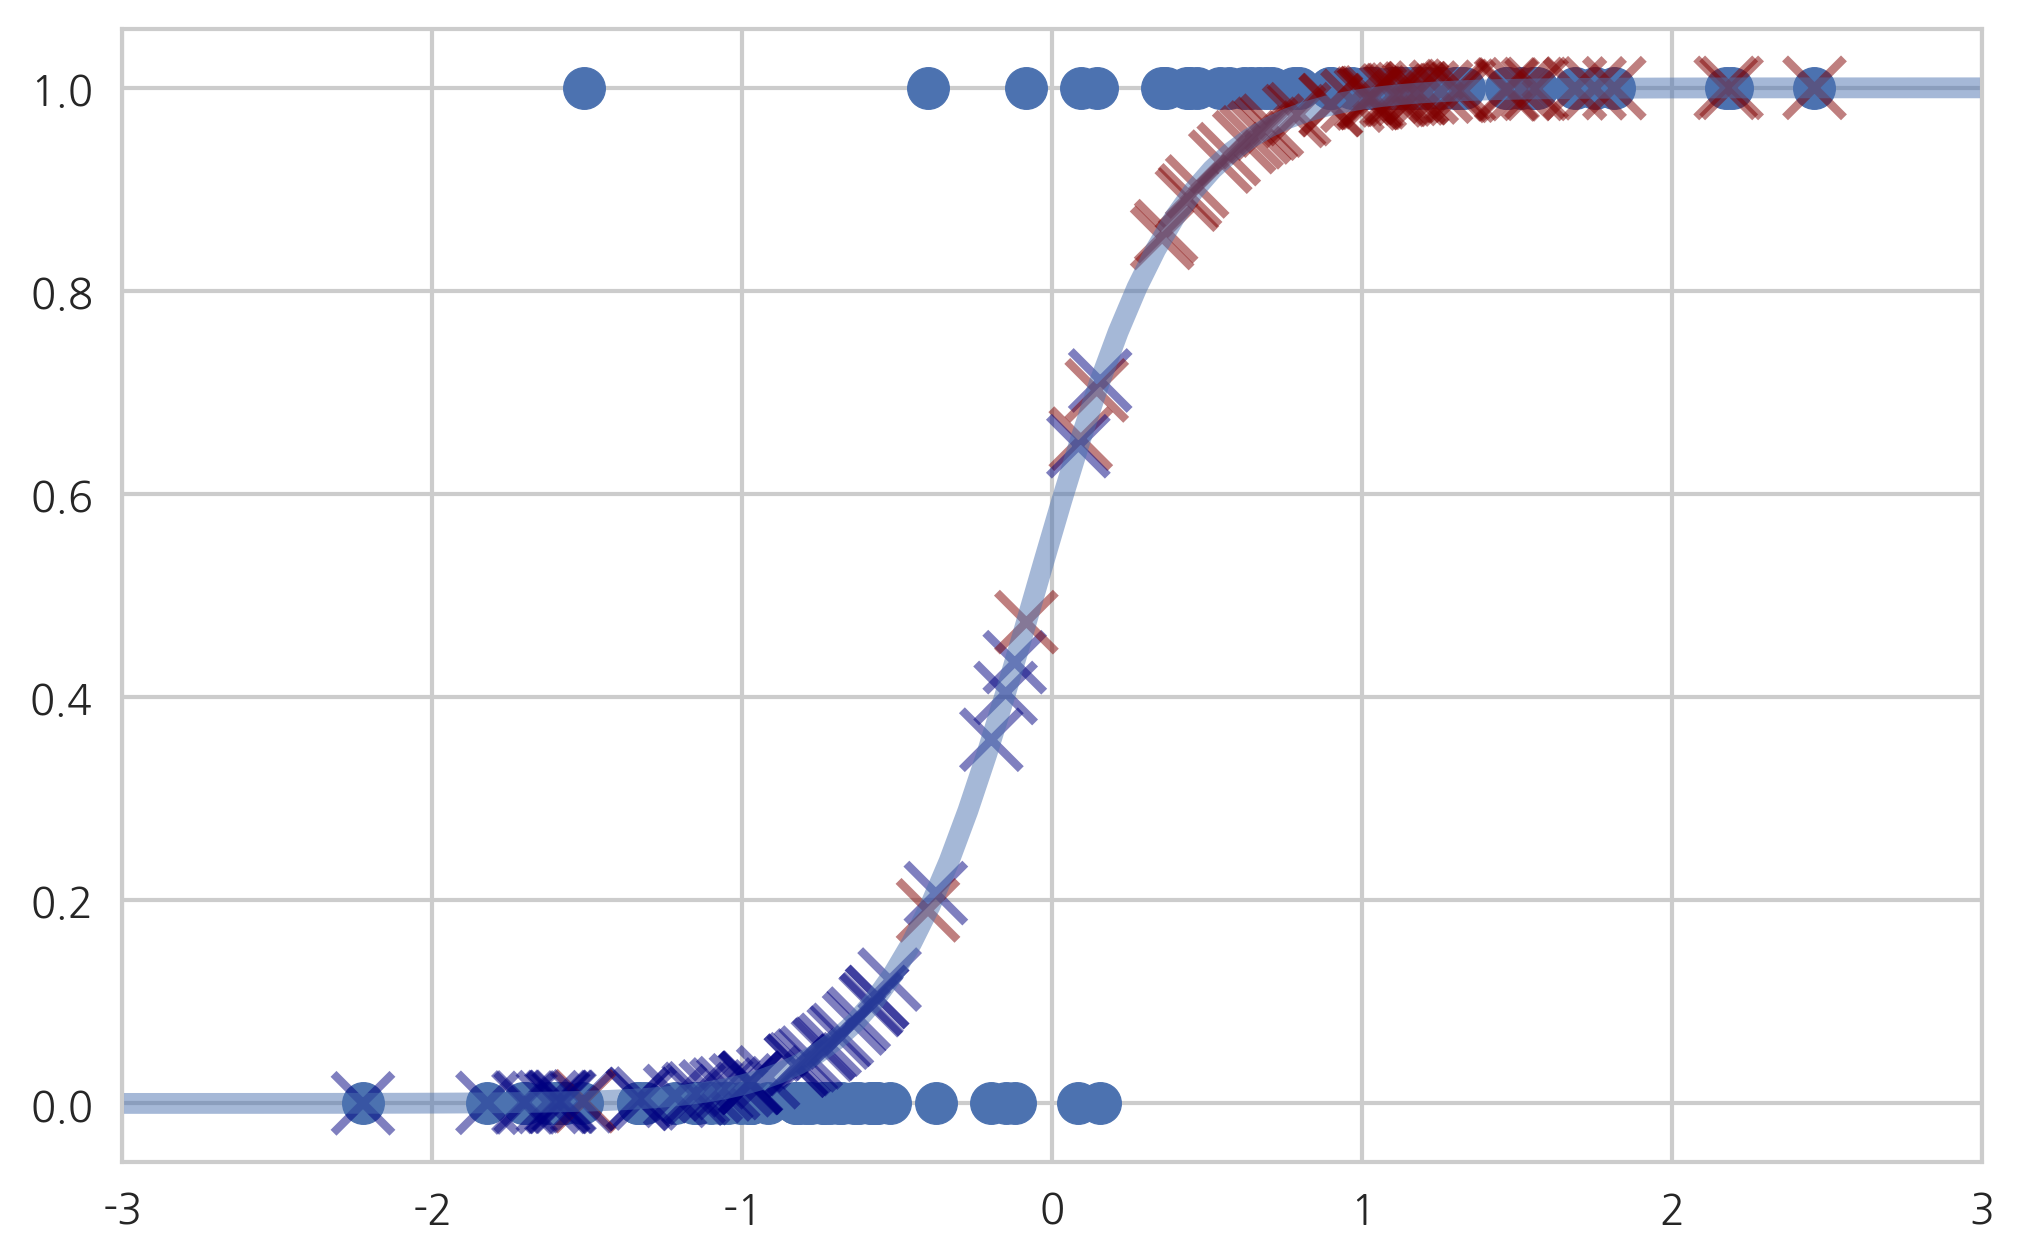

In [8]:
xx = np.linspace(-3, 3, 100)
sigmoid = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, sigmoid, lw=5, alpha=0.5)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, logit_res.predict(X), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

## 로지스틱 회귀의 계수 검정

로지스틱 회귀 분석 계수에 대해 계수값이 0인 경우를 귀무가설로 하는 Wald 검정을 할 수 있다.

$$ H_0: w_k = 0 $$

## 성능 측정

로지스틱 회귀 성능은 pseudo R square로 측정한다.

$$ R^2_{\text{pseudo}} = 1 - \dfrac{G^2}{G^2_0} $$

$G^2$는 deviance 라고 하는 양으로 다음과 같이 정의된다.

$$ G^2 = 2\sum_{i=1}^N \left( y_i\log\dfrac{y_i}{\hat{y}_i} + (1-y_i)\log\dfrac{1-y_i}{1-\hat{y}_i} \right) $$

여기에서 $\hat{y}$는 다음과 같다.

$$ \hat{y}_i = \theta(x_i) $$

$G^2$는 현재 deviance이고 $G^2_0$는 귀무 모형(null model)으로 측정한 deviance이다.

귀무 무형이란 모든 $x$가 $y$를 예측하는데 전혀 영향을 미치지 않는 모형을 말한다. 즉, 무조건부 확률 $p(y)$에 따라 $x$에 상관없이 동일하게 $y$를 예측하는 모형을 말한다.

## Scikit-Learn 패키지의 로지스틱 회귀

Scikit-Learn 패키지는 로지스틱 회귀 모형 `LogisticRegression` 를 제공한다. 

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X0, y)

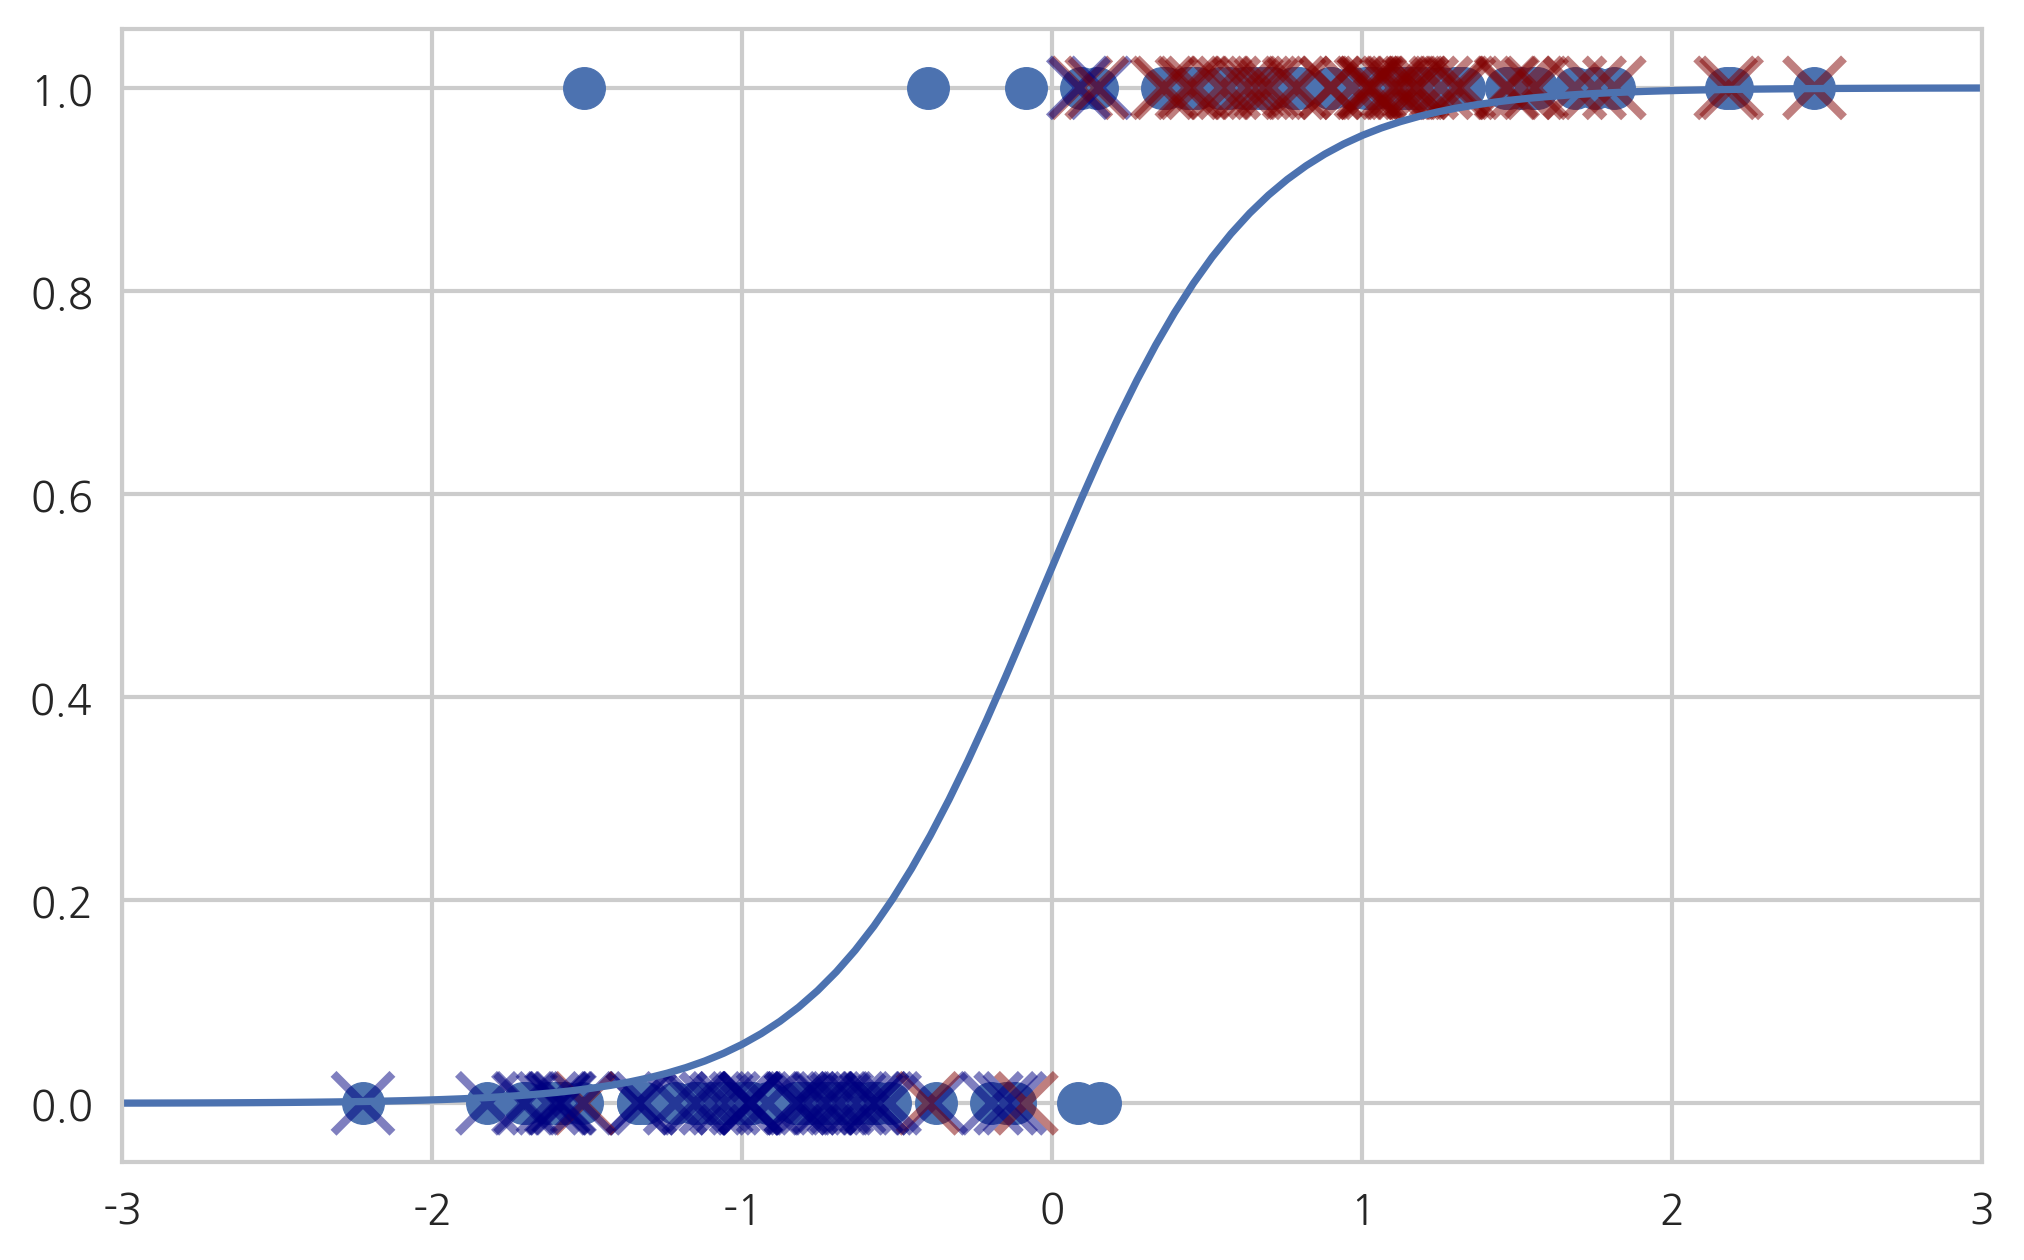

In [10]:
xx = np.linspace(-3, 3, 100)
sigm = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))
plt.plot(xx, sigm)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, model.predict(X0), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

### 예제 1: Michelin 가이드 평점 예측

다음 데이터는 뉴욕시의 개별 레스토랑의 고객 평가 점수와 Michelin 가이드 수록 여부를 보인 것이다.


* InMichelin: Michelin 가이드 수록 여부
* Restaurant Name: 레스토랑 이름
* Food: 식사에 대한 고객 평가 점수 (1~30)
* Decor: 인테리어에 대한 고객 평가 점수 (1~30)
* Service: 서비스에 대한 고객 평가 점수 (1~30)
* Price: 저녁 식사 가격 (US$)


In [15]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinNY.csv", 
                 encoding="latin1")
df.tail()

,InMichelin,Restaurant Name,Food,Decor,Service,Price
159,0,Terrace in the Sky,23,25,21,62
160,1,Tocqueville,25,21,24,65
161,1,Triomphe,25,22,22,65
162,0,Village,20,20,19,40
163,1,Vong,23,24,21,60


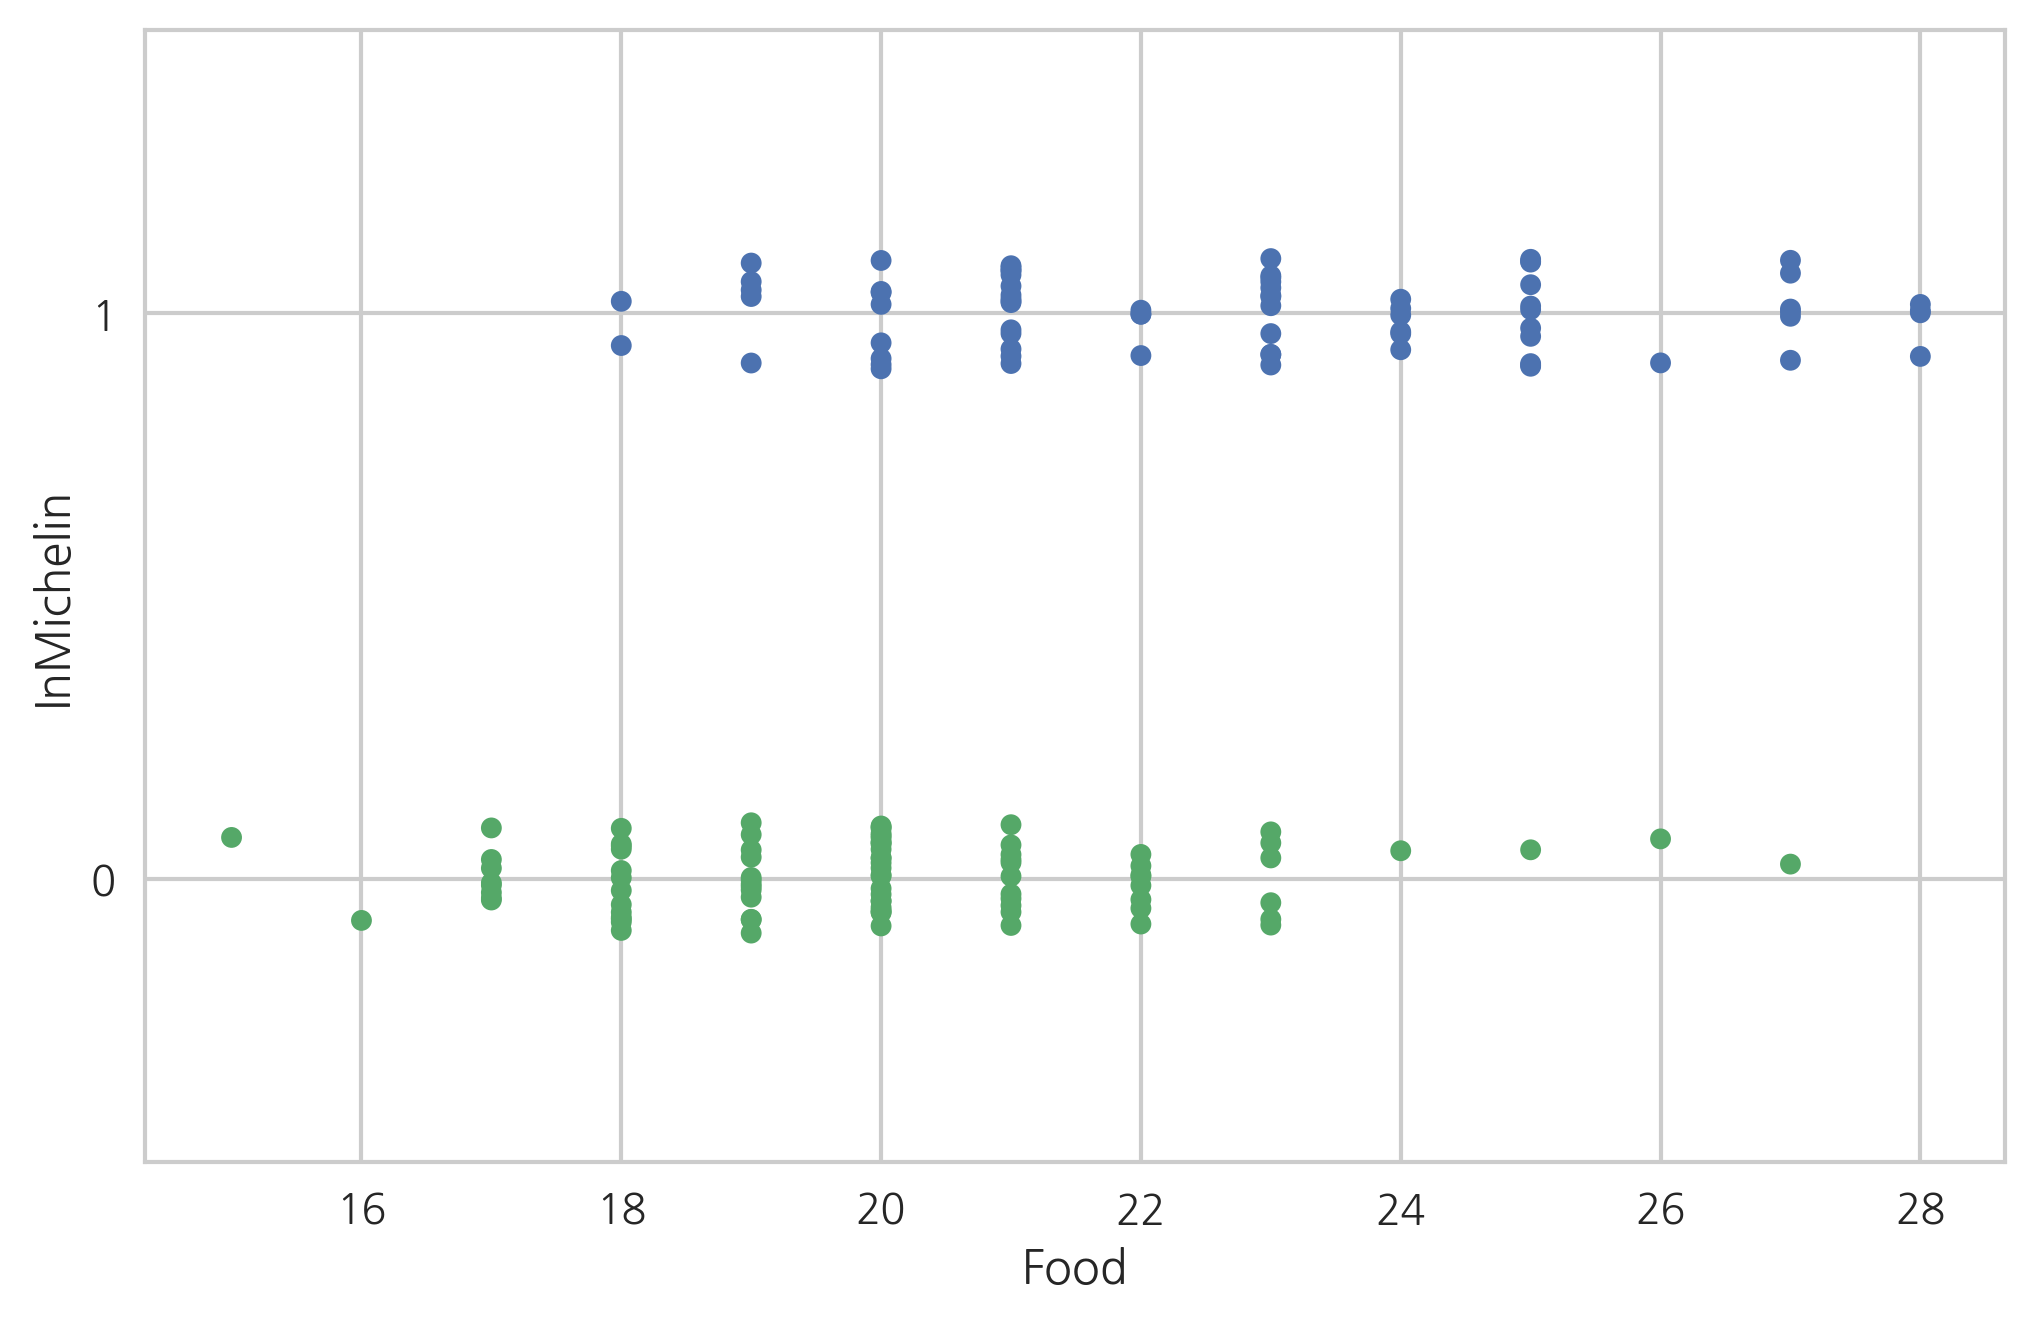

In [16]:
sns.stripplot(x="Food", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [17]:
model = sm.Logit.from_formula("InMichelin ~ Food + Decor + Service + Price", df)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  164
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.3428
Time:                        08:50:28   Log-Likelihood:                -74.198
converged:                       True   LL-Null:                       -112.89
                                        LLR p-value:                 6.213e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1975      2.309     -4.850      0.000     -15.723      -6.672
Food           0.4048      0.131      3.080      0.002       0.147       0.662
Decor          0.1000      0.089      1.121      0.2

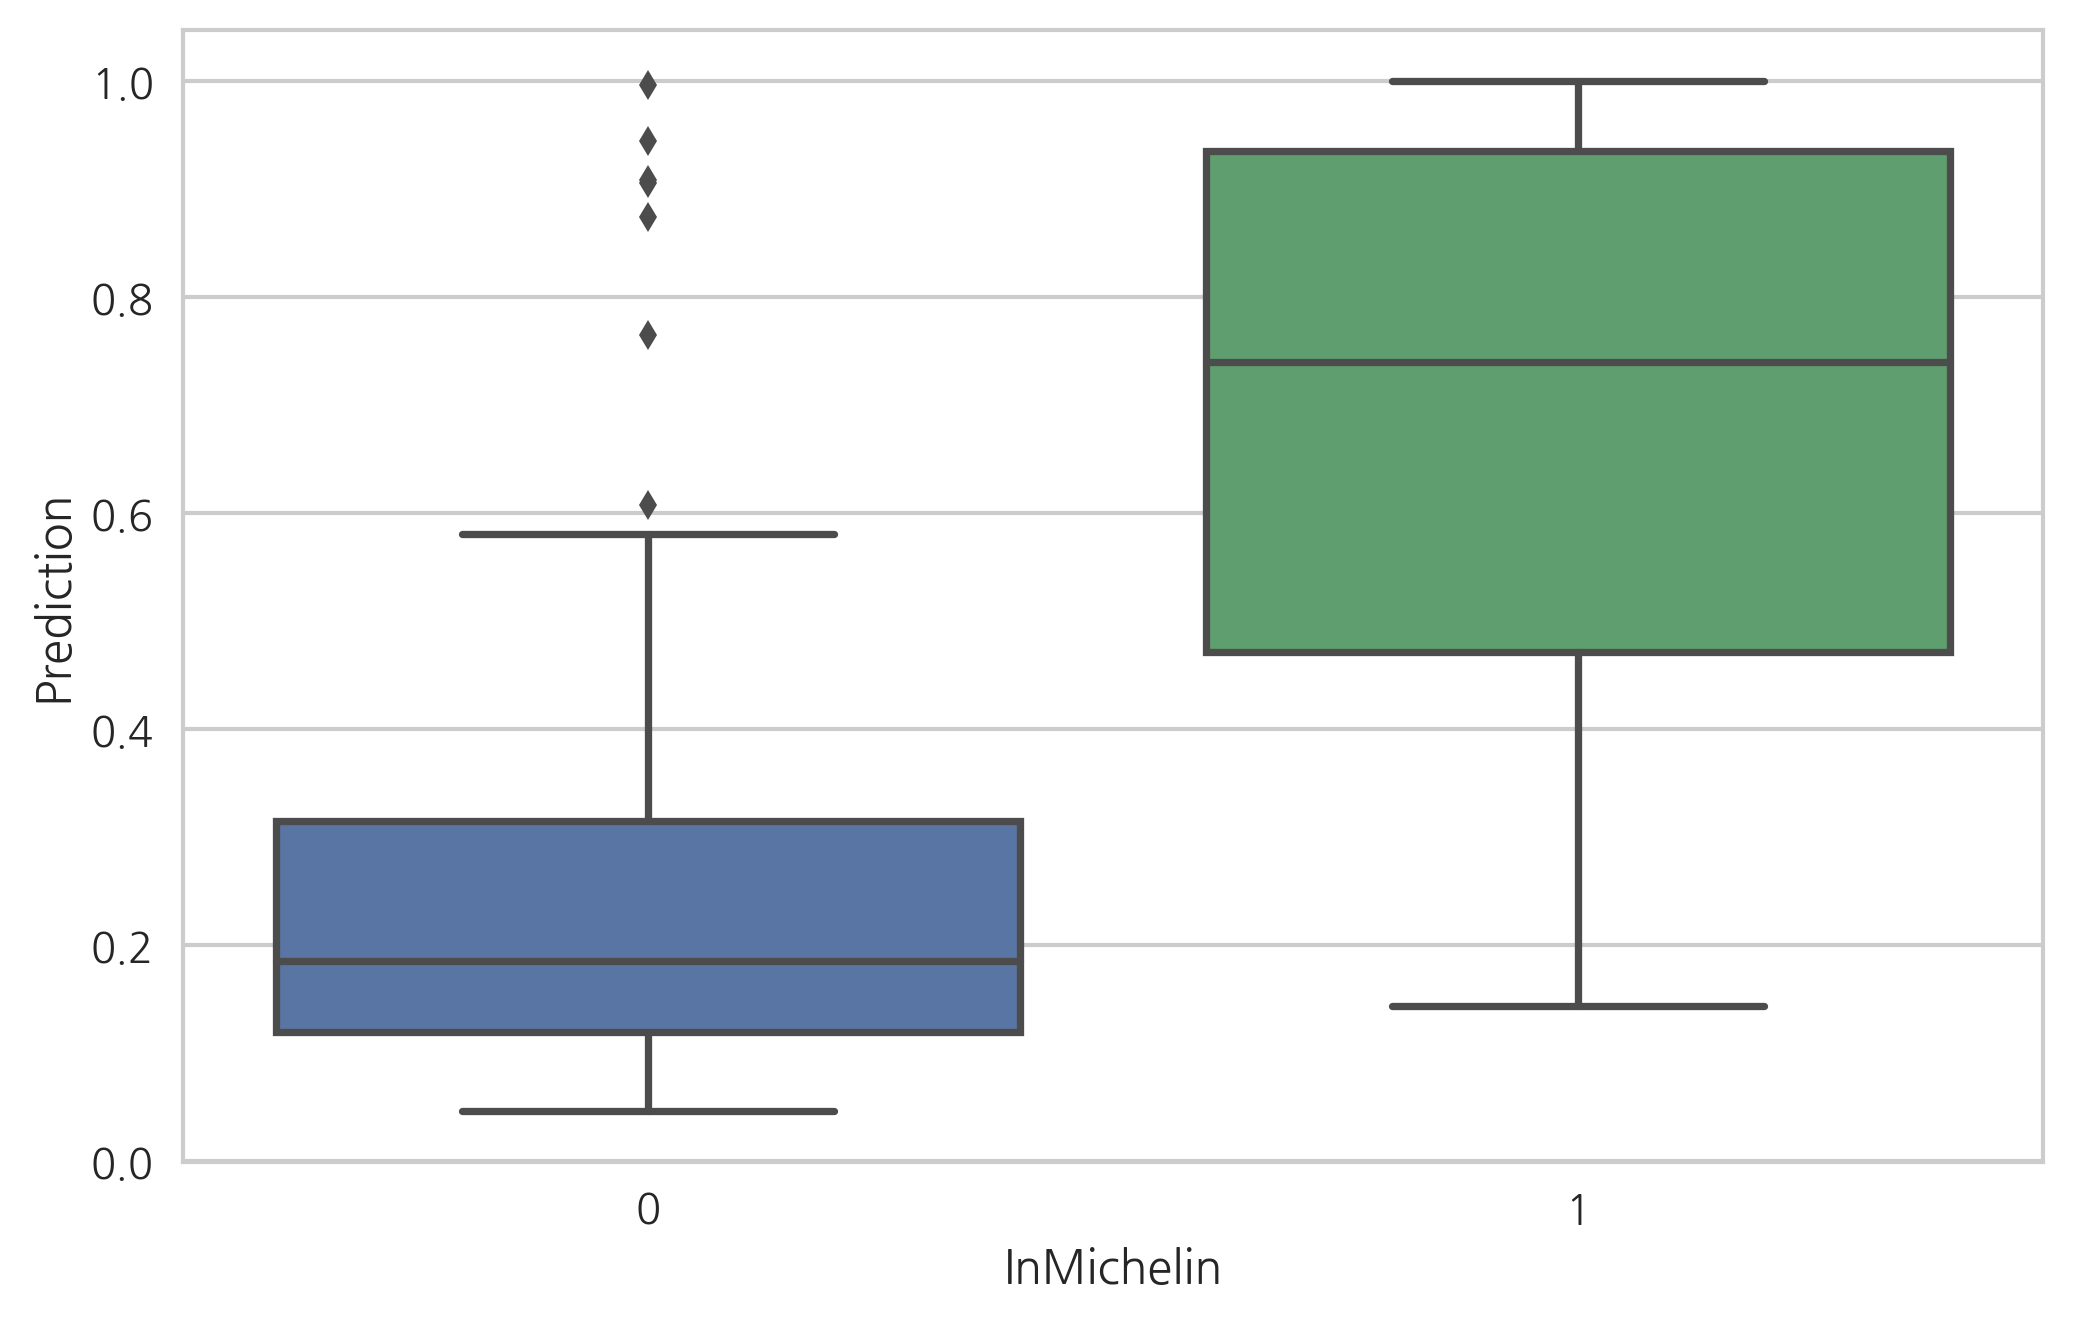

In [18]:
df["Prediction"] = result.predict(df)
sns.boxplot(x="InMichelin", y="Prediction", data=df)
plt.show()

#### 연습 문제 1

1. 붓꽃 분류 문제에서 클래스가 setosa, versicolor인 데이터만 사용하고 (setosa=0, versicolor=1) 독립변수로는 꽃받침 길이(Sepal Length)와 상수항만 사용하여 StatsModels 패키지의 로지스틱 회귀 모형으로 결과를 예측하고 보고서를 출력한다.
2. 위 결과를 confusion matrix와 classification report로 표현한다.
3. 이 모형에 대해 ROC커브를 그리고 AUC를 구한다. 이 때 Scikit-Learn의 `LogisticRegression`을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

#### 연습 문제 2

1. 붓꽃 분류 문제에서 클래스가 versicolor, virginica인 데이터만 사용하여 (versicolor=0, virginica=1) 로지스틱 회귀 모형으로 결과를 예측하고 보고서를 출력한다. 독립 변수는 모두 사용한다.
2. 위 결과를 confusion matrix와 classification report로 표현한다.
3. 이 모형에 대해 ROC커브를 그리고 AUC를 구한다.  이 때 Scikit-Learn의 `LogisticRegression`을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

## 로지스틱 회귀를 사용한 회귀 분석

로지스틱 회귀는 분류 문제가 아니라 종속변수 $y$가 0부터 1까지 막혀있는 회귀 분석 문제에도 사용할 수 있다. 이때는 다음처럼 $\theta$ 값을 종속 변수 y의 예측값으로 사용한다.

$$ \hat{y} = \theta(x) $$

만약 실제 y의 범위가 0부터 1이 아니면 스케일링을 통해 바꿔야 한다.

### 예제 2: Michelin and Zagat 가이드 비교

다음 데이터는 뉴욕시의 레스토랑에 대한 두 개의 가이드북에서 발취한 것이다.

* Food: Zagat Survey 2006 의 고객 평가 점수
* InMichelin: 해당 고객 평가 점수를 받은 레스토랑 중 2006 Michelin Guide New York City 에 실린 레스토랑의 수
* NotInMichelin: 해당 고객 평가 점수를 받은 레스토랑 중 2006 Michelin Guide New York City 에 실리지 않은 레스토랑의 수
* mi: 해당 고객 평가 점수를 받은 레스토랑의 수
* proportion: 해당 고객 평가 점수를 받은 레스토랑 중 2006 Michelin Guide New York City 에 실린 레스토랑의 비율

In [11]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinFood.txt", sep="\t")
df.tail()

,Food,InMichelin,NotInMichelin,mi,proportion
9,24,6,1,7,0.86
10,25,11,1,12,0.92
11,26,1,1,2,0.50
12,27,6,1,7,0.86
13,28,4,0,4,1.00


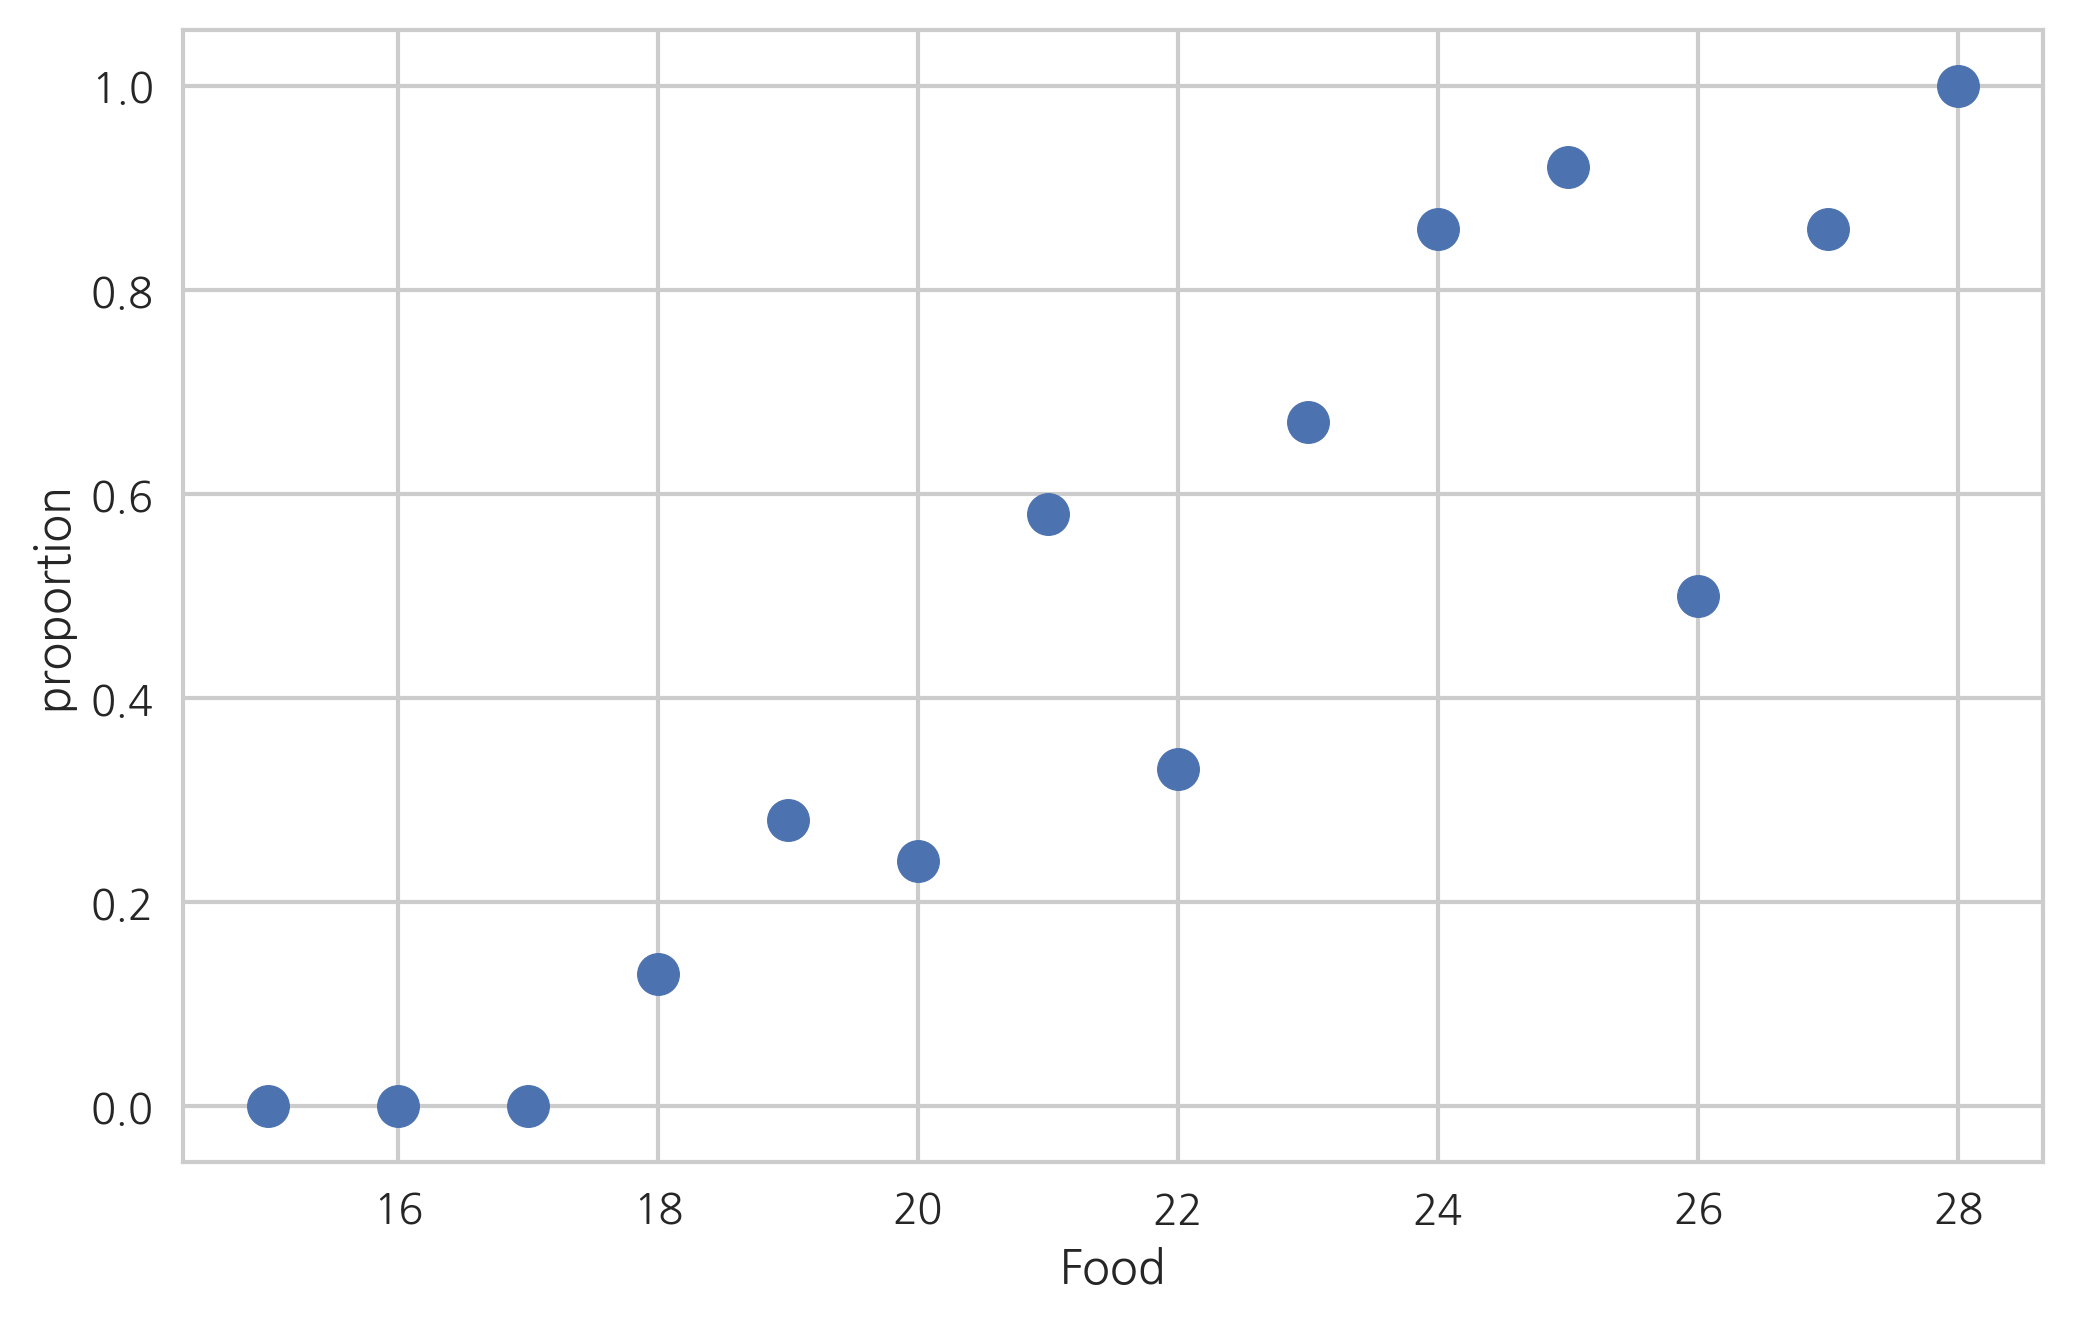

In [12]:
df.plot(kind="scatter", x="Food", y="proportion", s=100)
plt.show()

In [13]:
X = sm.add_constant(df.Food)
y = df.proportion
model = sm.Logit(y, X)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             proportion   No. Observations:                   14
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.4832
Time:                        08:50:25   Log-Likelihood:                -4.9712
converged:                       True   LL-Null:                       -9.6189
                                        LLR p-value:                  0.002297
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3600      5.211     -1.988      0.047     -20.574      -0.146
Food           0.4671      0.235      1.991      0.046       0.007       0.927


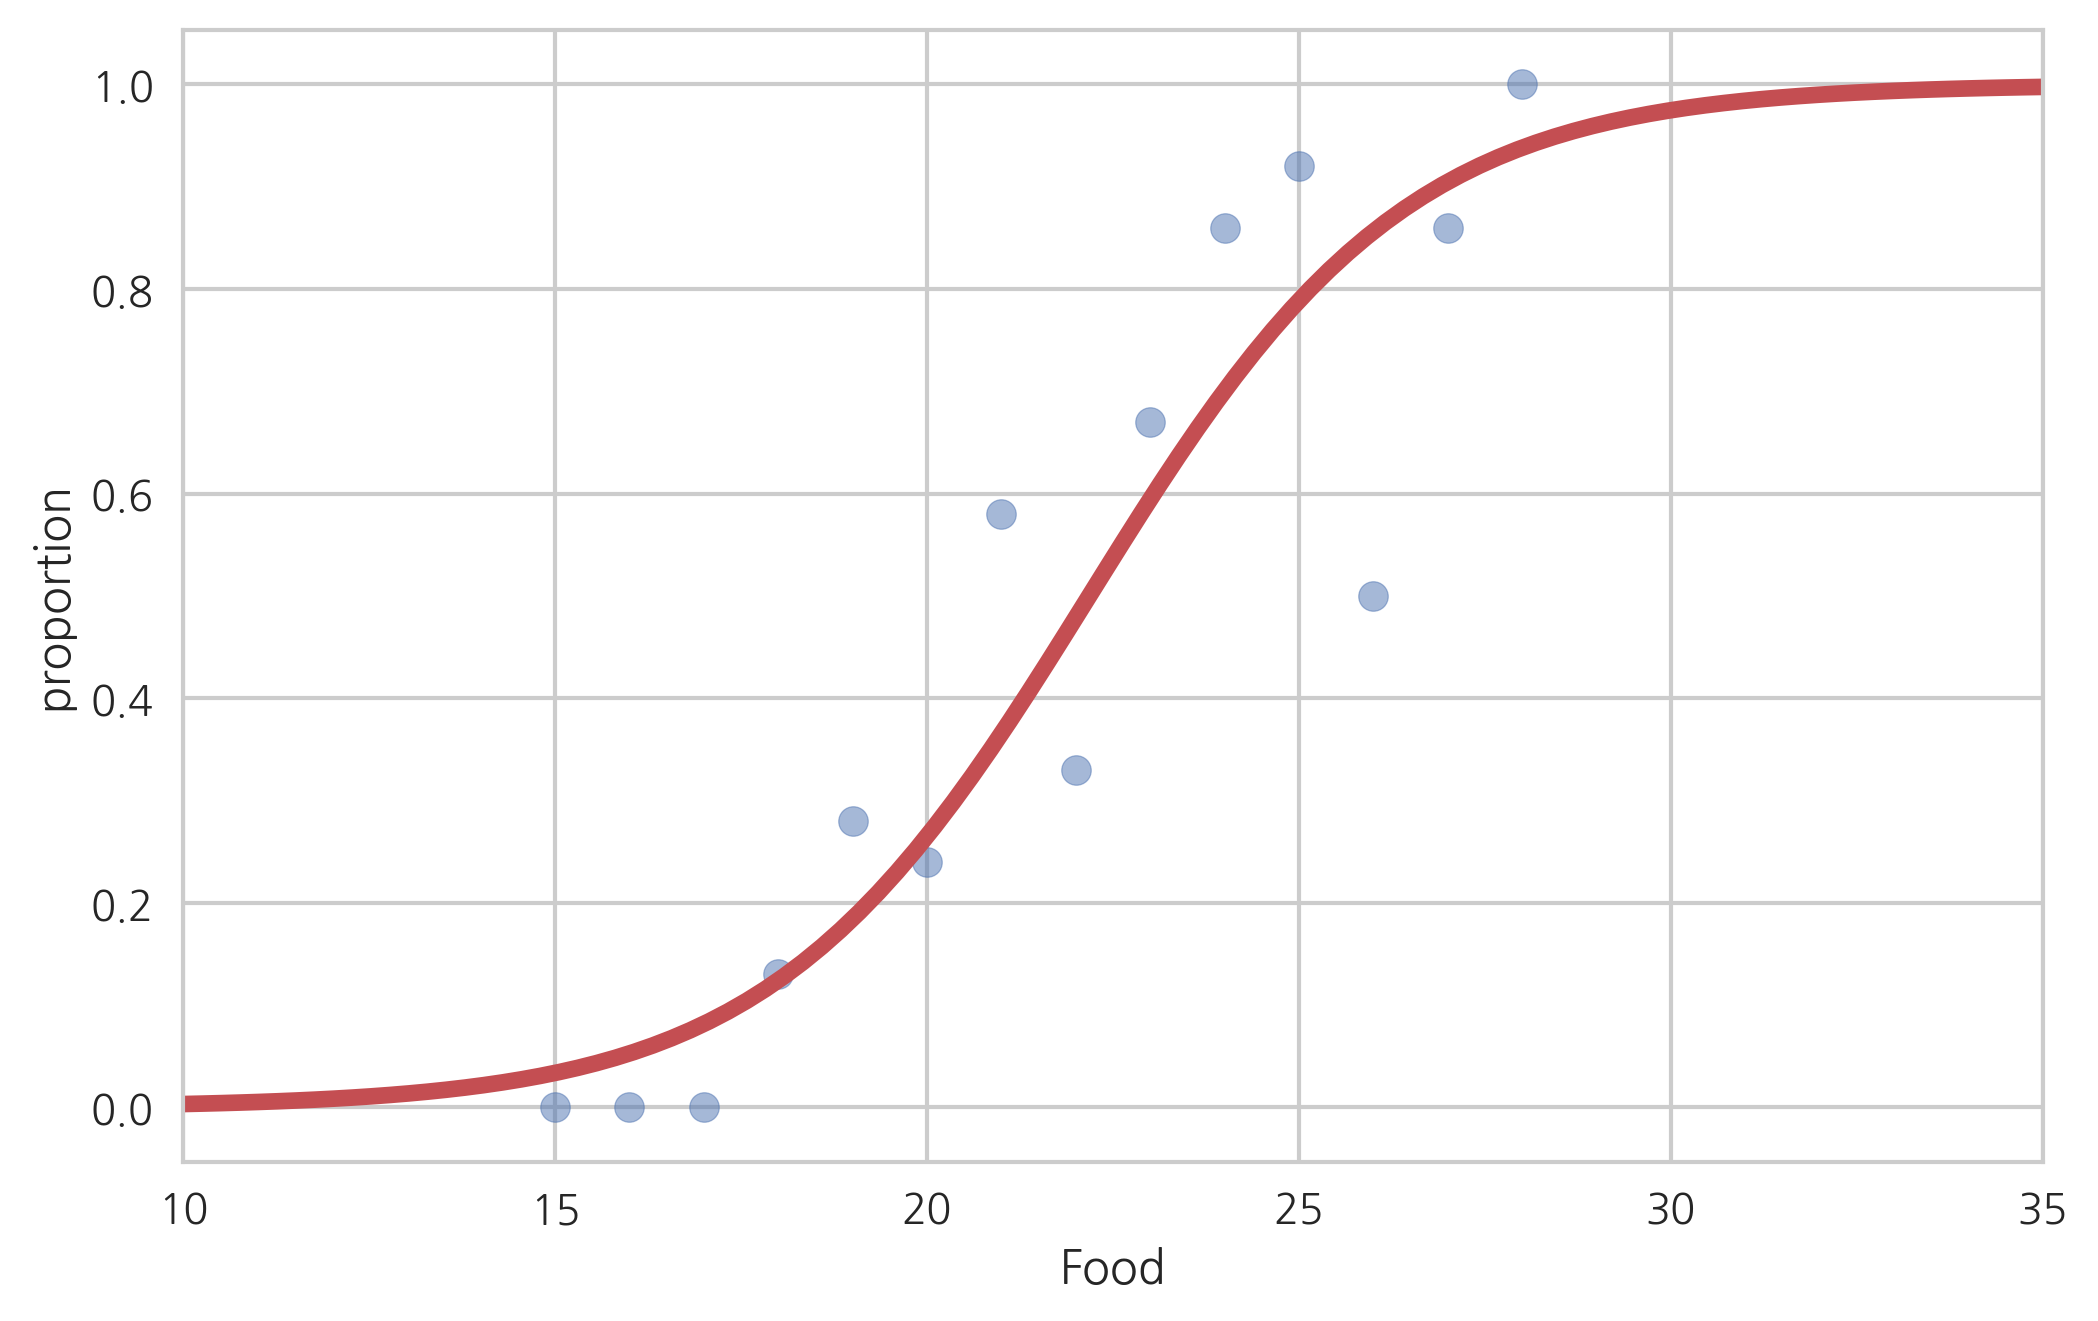

In [14]:
df.plot(kind="scatter", x="Food", y="proportion", s=50, alpha=0.5)
xx = np.linspace(10, 35, 100)
plt.plot(xx, result.predict(sm.add_constant(xx)), "r", lw=4)
plt.xlim(10, 35)
plt.show()